In [2]:
import pandas as pd
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
positive_texts = pd.read_csv(r"C:\Users\andre\Downloads\DataScience\Datasets\positive_texts.csv",  header=None)
negative_texts = pd.read_csv(r"C:\Users\andre\Downloads\DataScience\Datasets\negative_texts.csv",  header=None)
test_texts     = pd.read_csv(r"C:\Users\andre\Downloads\DataScience\Datasets\test_texts.csv",      header=None)

In [4]:
positive_concat          = pd.DataFrame(positive_texts)
positive_concat.columns  = ["val"]
positive_concat["val"].tolist()

['we love you', 'they love us', 'you are good', 'he is good', 'they love mary']

In [5]:
negative_concat          = pd.DataFrame(negative_texts)
negative_concat.columns  = ["val"]
negative_concat["val"].tolist()

['we hate you', 'they hate us', 'you are bad', 'he is bad', 'we hate mary']

In [6]:
test_concat              = pd.DataFrame(test_texts)
test_concat.columns      = ["val"]
test_concat["val"].tolist()

['they love mary',
 'they are good',
 'why do you hate mary',
 'they are almost always good',
 'we are very bad']

In [7]:
training_texts  =  positive_concat["val"].tolist() + negative_concat["val"].tolist()
training_labels = ["positive"] * len(positive_texts) + ["negative"] * len(negative_texts)
test_texts      = test_concat["val"].tolist()

In [8]:
print(training_texts)

['we love you', 'they love us', 'you are good', 'he is good', 'they love mary', 'we hate you', 'they hate us', 'you are bad', 'he is bad', 'we hate mary']


In [9]:
print(training_labels)

['positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative']


In [10]:
vectorizer = CountVectorizer()

In [11]:
vectorizer.fit(training_texts)

CountVectorizer()

In [12]:
print(vectorizer.vocabulary_)

{'we': 10, 'love': 6, 'you': 11, 'they': 8, 'us': 9, 'are': 0, 'good': 2, 'he': 4, 'is': 5, 'mary': 7, 'hate': 3, 'bad': 1}


In [20]:
training_vectors = vectorizer.transform(training_texts)
testing_vectors = vectorizer.transform(test_texts)

In [18]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(training_vectors, training_labels)
predictions = classifier.predict(testing_vectors)
print(predictions)

['positive' 'positive' 'negative' 'positive' 'negative']


In [17]:
predictions = pd.DataFrame(predictions)
predictions.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


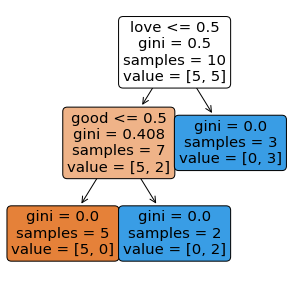

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
tree.plot_tree(classifier,feature_names = vectorizer.get_feature_names(), rounded = True, filled = True) 
fig.savefig('tree.png')